## Olympische Spiele predictor, Hani Ouraghene
### Der Datensatz den ich verwende bezieht sich auf die Olympischen Spiele 1964 - 2016.
### Basierend auf der Anzahl der Athleten und den bereits gewonnenen Medaillen aus 1964-2008, trainiere ich ein Modell mittels Linearer Regression um vorherzusagen, wie viele Medaillien ein Team in den darauffolgenden Olympischen Spielen 2012-2016 gewinnen wird.

In [1]:
import pandas as pd

In [2]:
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [3]:
teams = teams[["team","country","year","athletes","age","prev_medals","medals"]]
teams.head(3)

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0


In [4]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [5]:
teams = teams.dropna()

In [6]:
teams.corr(numeric_only="true")["medals"]

year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [7]:
import matplotlib.pyplot as plt

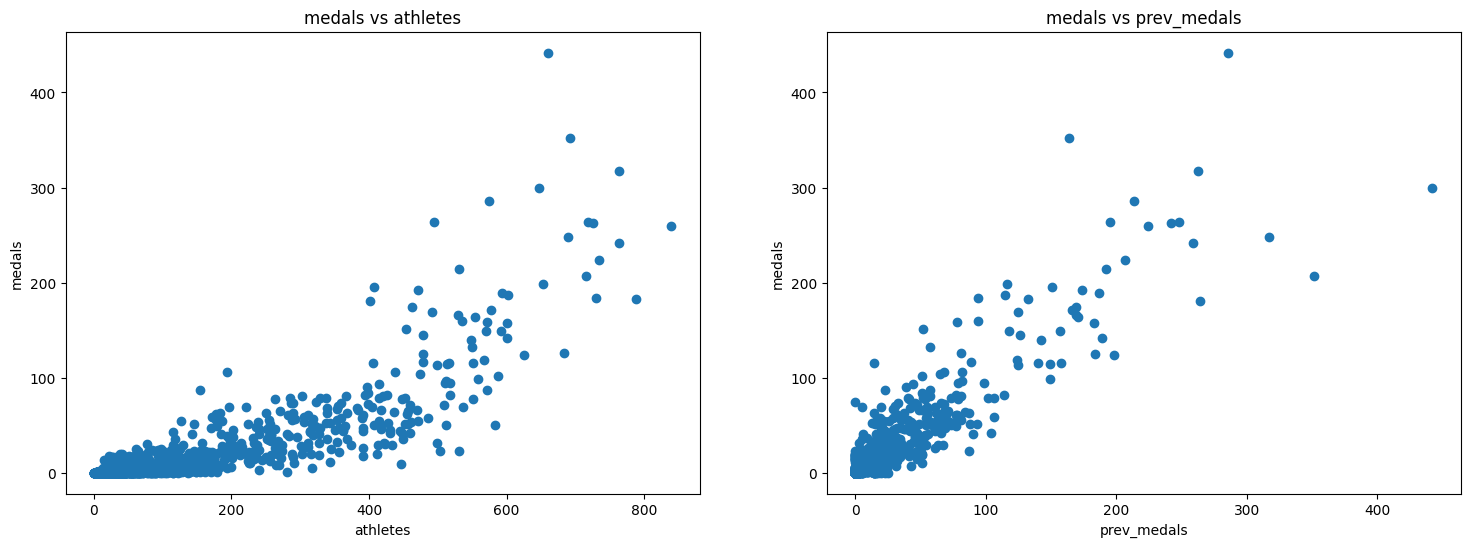

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(teams["athletes"],teams["medals"])
ax[0].set_title("medals vs athletes")
ax[0].set_xlabel("athletes")
ax[0].set_ylabel("medals")
ax[1].scatter(teams["prev_medals"],teams["medals"])
ax[1].set_title("medals vs prev_medals")
ax[1].set_xlabel("prev_medals")
ax[1].set_ylabel("medals")
plt.show()


#### Die Anzahl aktuell gewonnener Medallien weist eine starke Korrelation mit der Anzahl Athleten und der Anzahl vergangener Medallien auf. Es wird also ziemlich gut klappen, basierend auf diesen beiden Spalten, vorhersagen zu treffen.

#### Wir sollten den Datensatz in Test und Training unterteilen, um später zu validieren wie gut unser Modell geklappt hat. Dabei werden wir die Olympischen Spiele 2012 und 2016 vorhersagen, also werden die vorherigen Jahre als Trainingsdaten genutzt.

In [9]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [10]:
p = train.shape[0] / teams.shape[0]
print("Anteil Trainingsdaten: {}%".format(round(100 * p)))
print("Anteil Testdaten: {}%".format(round(100*(1-p))))

Anteil Trainingsdaten: 80%
Anteil Testdaten: 20%


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

x = ["athletes","prev_medals"]
y = "medals"

x_train = train[x]
y_train = train[y]

model.fit(x_train,y_train)
print("parameter: ", model.coef_)
print("bias-term: ", model.intercept_)

parameter:  [0.07170379 0.75062549]
bias-term:  -2.1420694641161315


#### Das allgemeine Modell: Y = w0 + w1*x1 + w2*x
#### => medals = -2.14 + 0.07 * athletes + 0.75 * prev_medals

In [13]:
x_test = test[x]
y_pred = model.predict(x_test)
test["predictions"] = y_pred
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round().astype(int)
test[120:140]

,team,country,year,athletes,age,prev_medals,medals,predictions
628,EST,Estonia,2012,36,27.3,3.0,2,3
629,EST,Estonia,2016,49,27.5,2.0,4,3
639,ETH,Ethiopia,2012,34,23.8,7.0,7,6
640,ETH,Ethiopia,2016,38,23.4,7.0,8,6
651,FIJ,Fiji,2012,9,25.1,0.0,0,0
652,FIJ,Fiji,2016,53,24.9,0.0,13,2
665,FIN,Finland,2012,69,27.5,5.0,5,7
666,FIN,Finland,2016,67,26.4,5.0,1,6
679,FRA,France,2012,426,26.6,77.0,82,86
680,FRA,France,2016,512,27.1,82.0,96,96


In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
error = mean_absolute_error(test["medals"],test["predictions"])
float(error)

3.2987654320987656

In [16]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

####  Im Schnitt weicht das Modell bei der Vorhersage um ungefähr 3 Medallien von der tatsächlichen Anzahl ab, was bei durchschnittlich 33 Medallien pro Team schon ziemlich gut ist